# Pip Installs

In [1]:
!pip install pandasql
!pip install sqlalchemy==1.4.46
!pip install sweetviz
!pip install lazypredict

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26800 sha256=20eda51f3c71c5364c112d581710ef5dd8ba5a5f312543231ae09798a500f26b
  Stored in directory: c:\users\l.pollard\appdata\local\pip\cache\wheels\68\5d\a5\edc271b998f909801d7956959f699b976cc9896075dc47c153
Successfully built pandasql
  Obtaining dependency information for sqlalchemy==1.4.46 from https://files.pythonhosted.org/packages/bd/2d/db768a164efcd36c8ec1accf559dd89bda60fbaec33913207fc78d2043cf/SQLAlchemy-1.4.46-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ----- ---------------------------------- 0.2/1.6 MB 4.1 MB/s eta 0:00:01
   ------------- -------------------------- 0.6/1.6 MB 5.8 MB/s eta 0:00:01
   ------------------------ --------------- 1.0/1.6 MB 6.8 MB/s eta 0:00:01
   ----------------------------------- ---- 1.4/1.6 MB 7.5 MB/s

# Imports

In [3]:
import pandas as pd
from pandasql import sqldf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sweetviz as sv
import os
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **1. Linear Regression**

Linear regression is a foundational statistical method that allows us to model and examine the relationship between two continuous variables. In this case, we are looking at the relationship between median income and median house value.

In this example, we'll use **one (a single)** feature, **'TV Advertising Spend'(x-axis),** to predict the **'Sales (y-axis)'**.

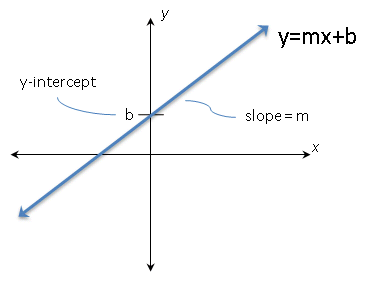

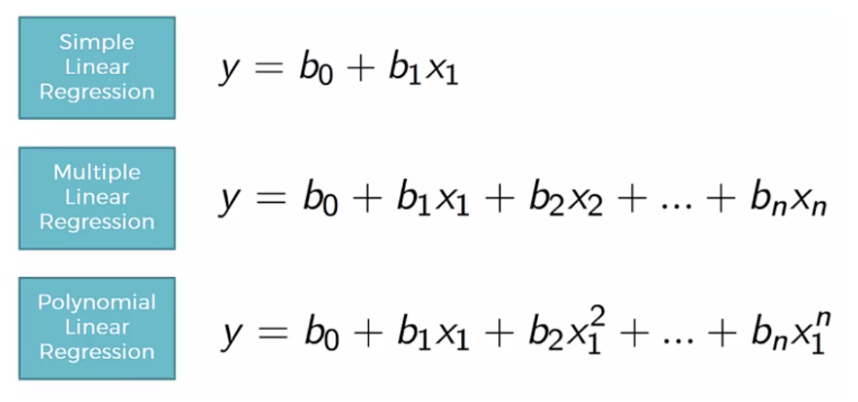

# Basic EDA

In [3]:
# mount the drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# change the directory to our file location
os.chdir('/content/drive/MyDrive/datasets')

In [5]:
# load our file as a dataframe
filename = 'advertising_and_sales.csv'

df = pd.read_csv(filename)

df.head()

,tv,radio,social_media,sales
0,16000,6566.23,2907.98,54732.76
1,13000,9237.76,2409.57,46677.90
2,41000,15886.45,2913.41,150177.83
3,83000,30020.03,6922.30,298246.34
4,15000,8437.41,1406.00,56594.18


                                             |          | [  0%]   00:00 -> (? left)


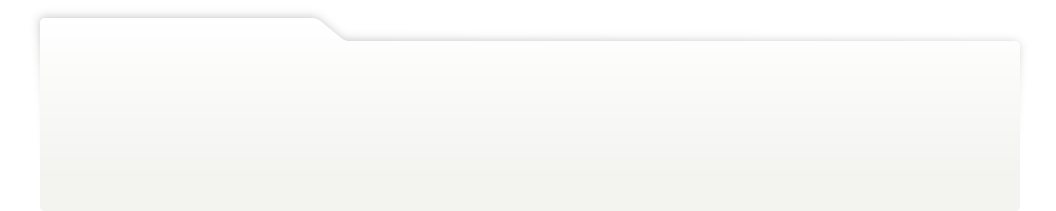
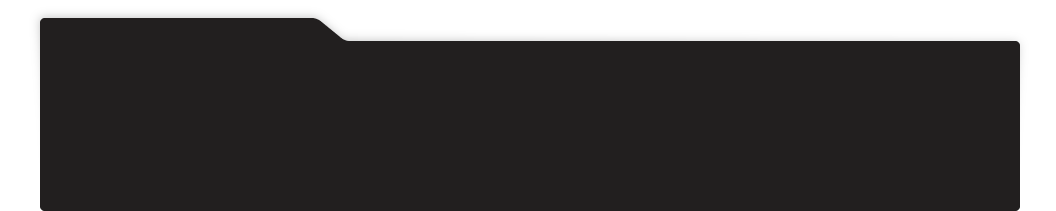
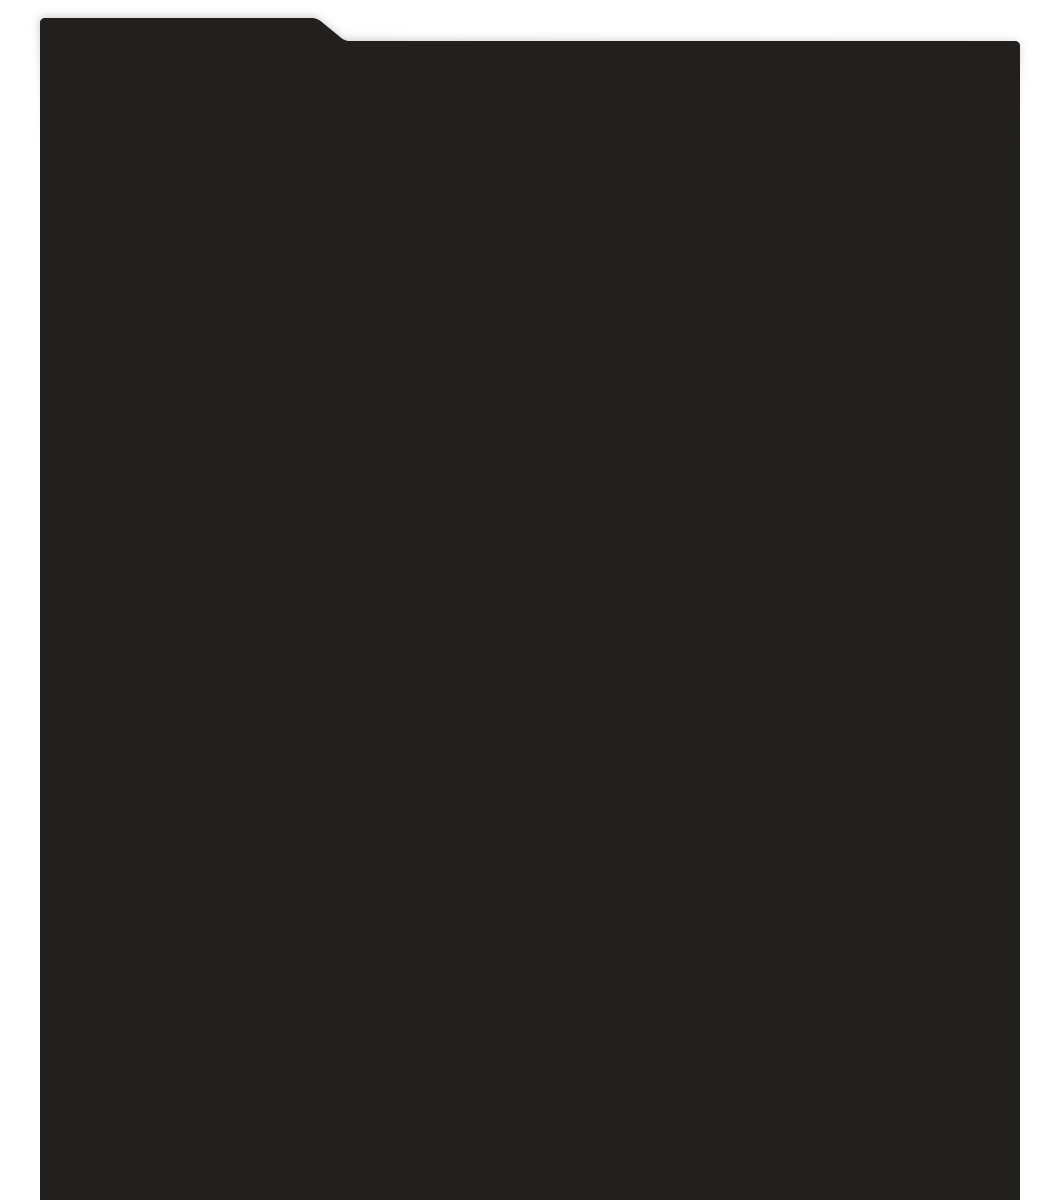
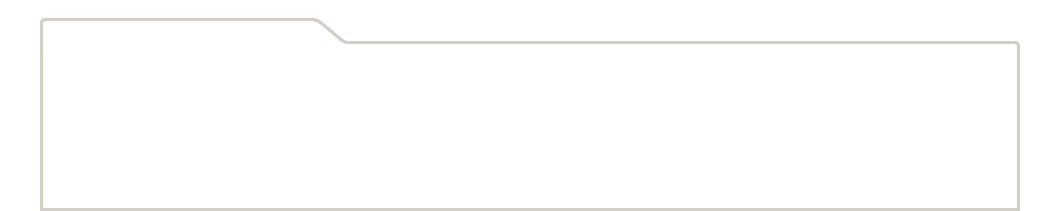
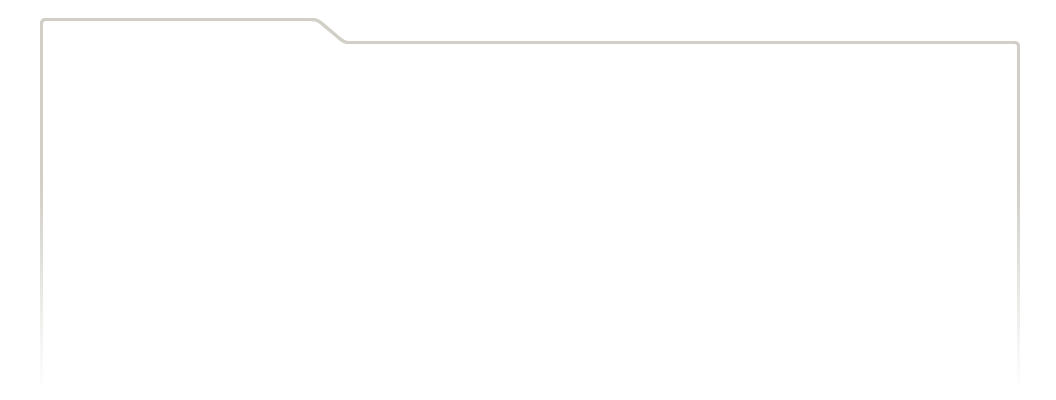
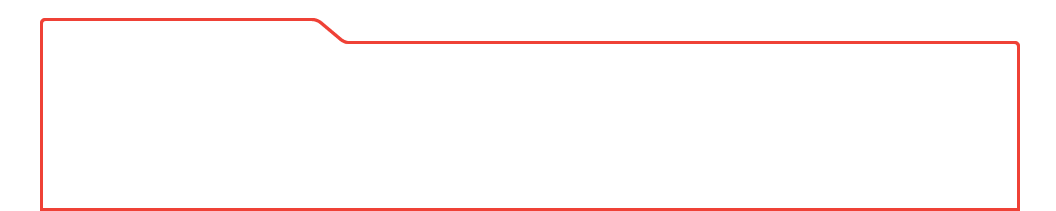
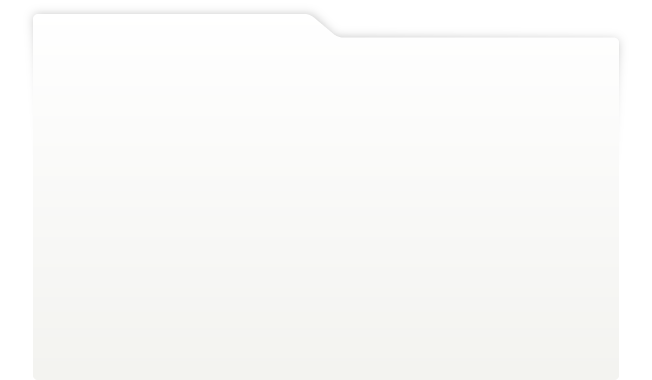
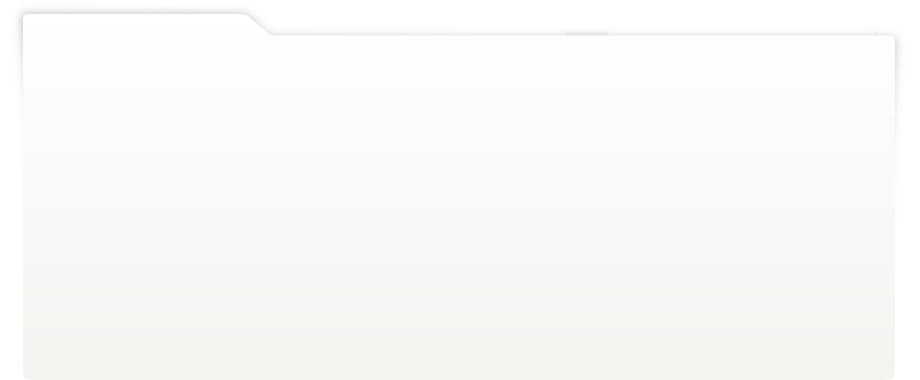
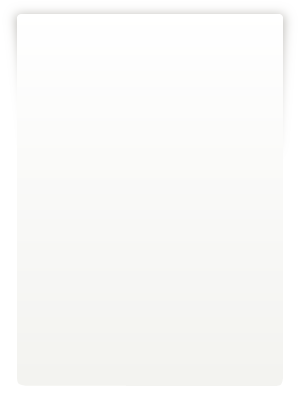
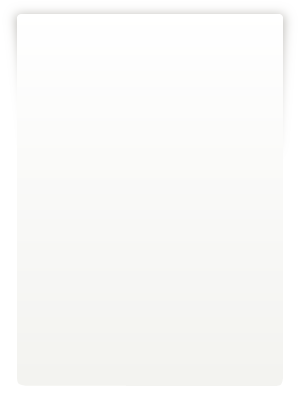
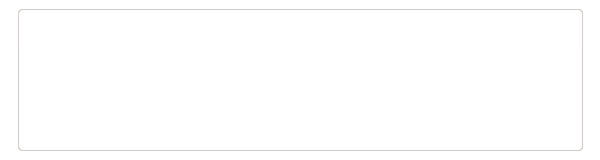
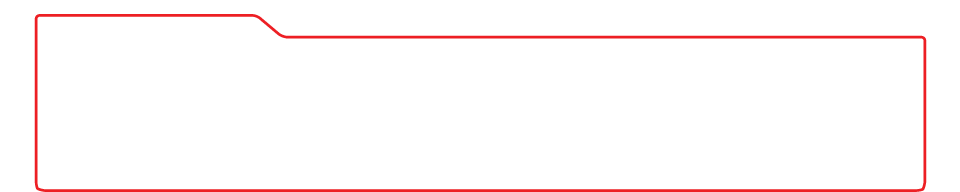
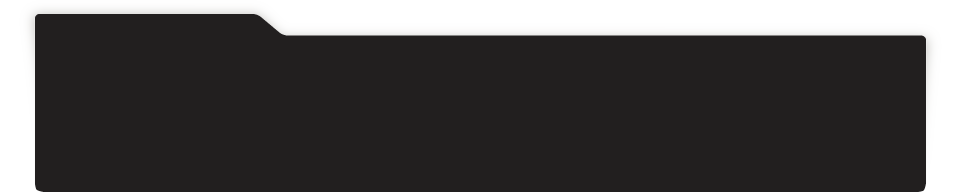
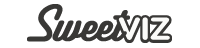
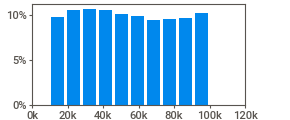
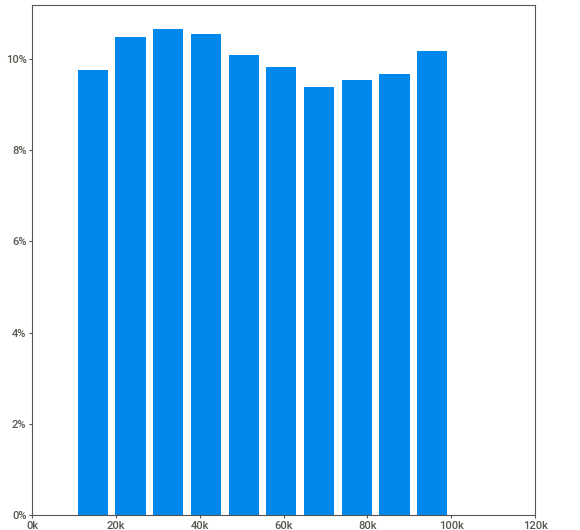
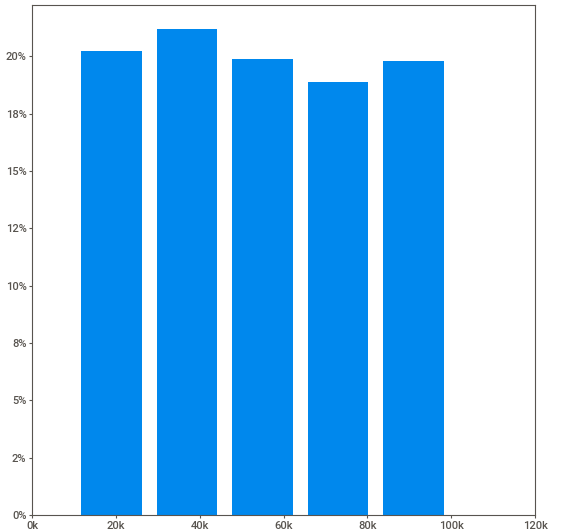
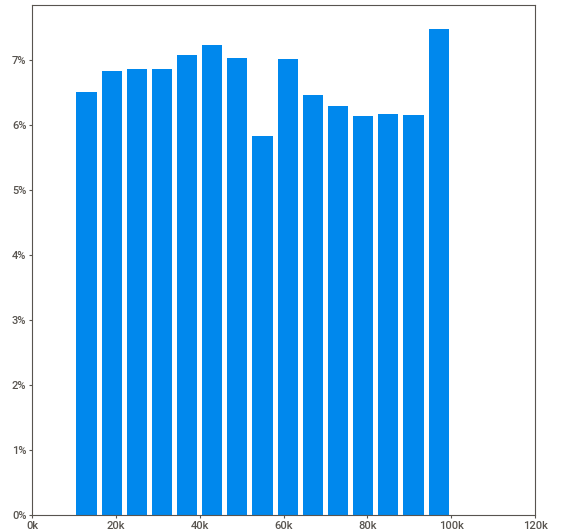
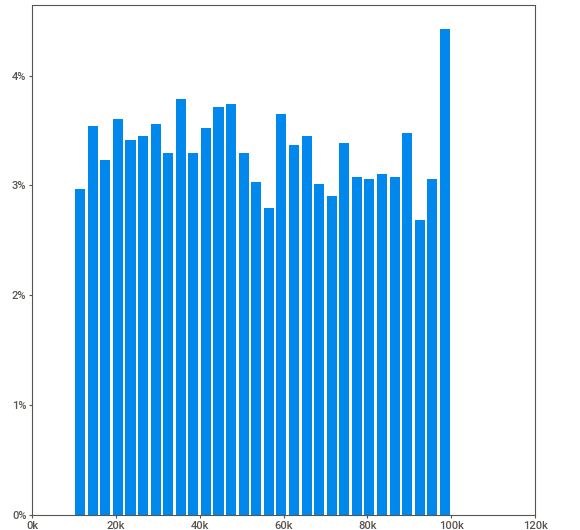
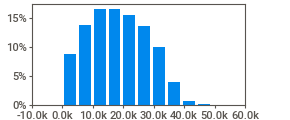
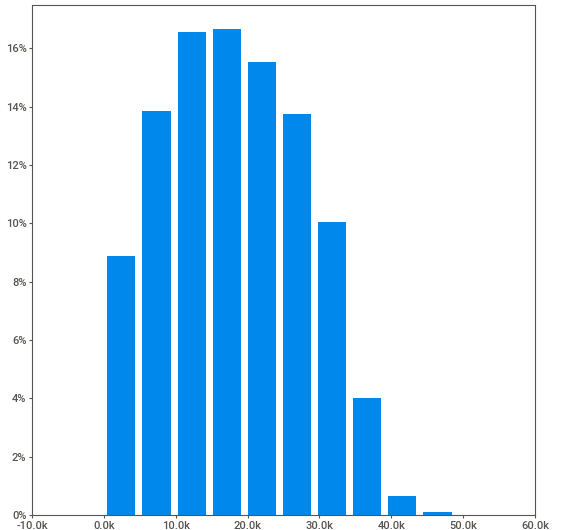
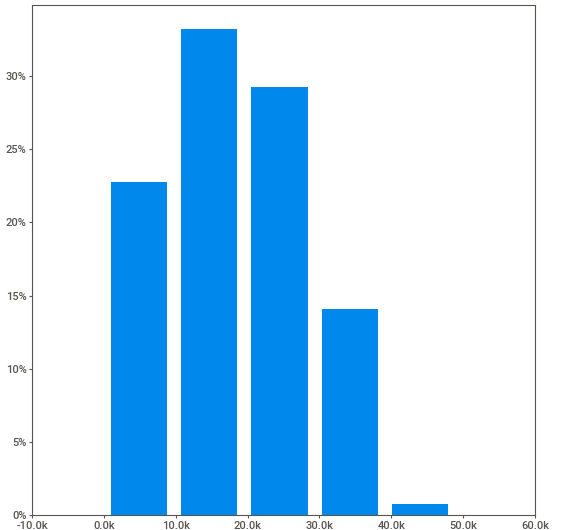
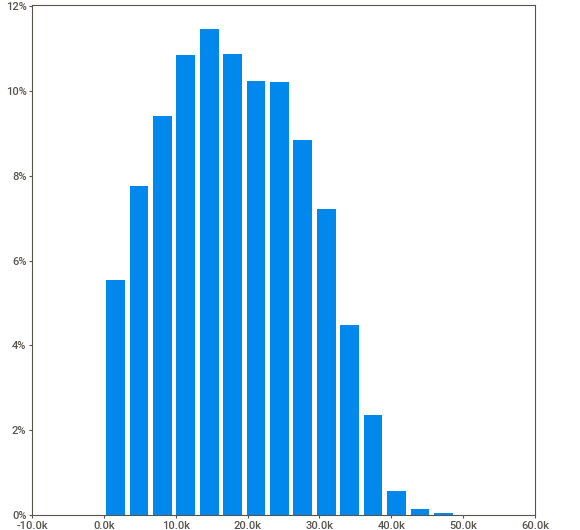
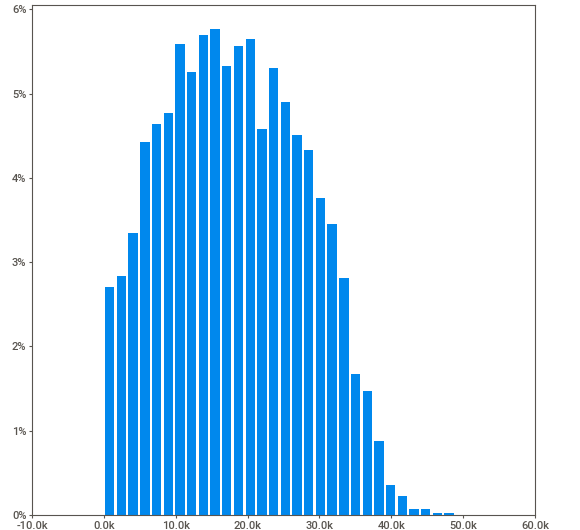
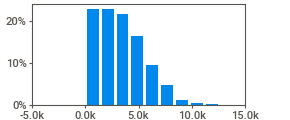
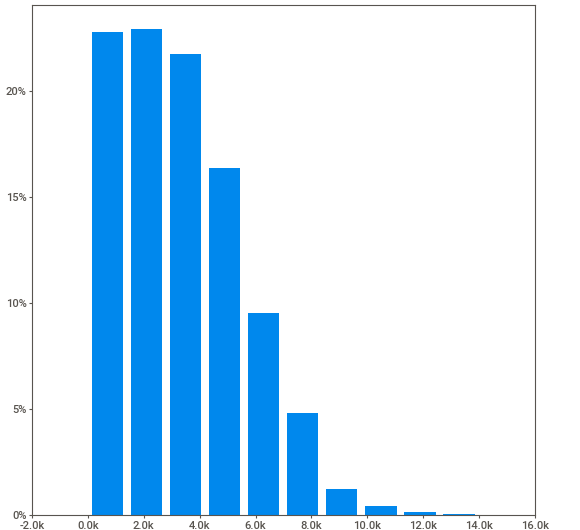
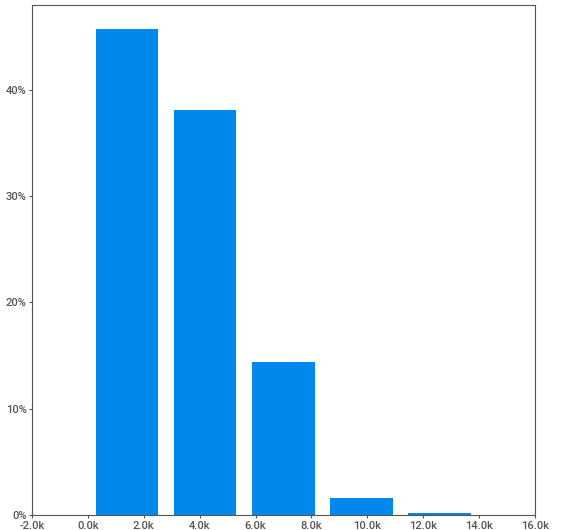
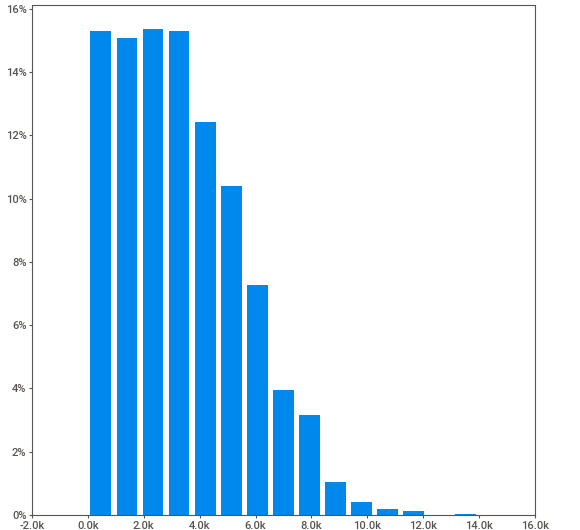
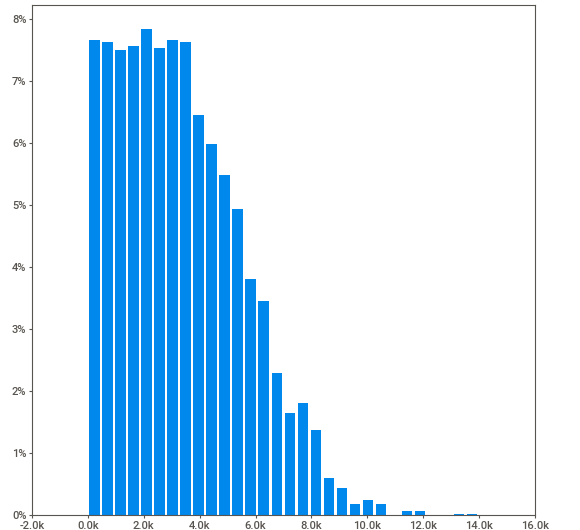
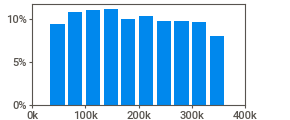
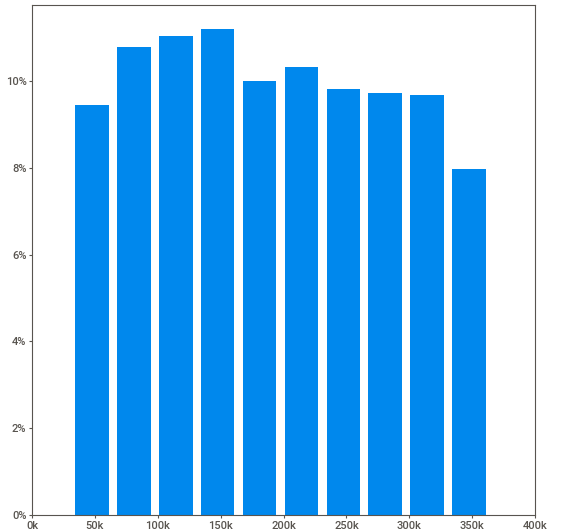
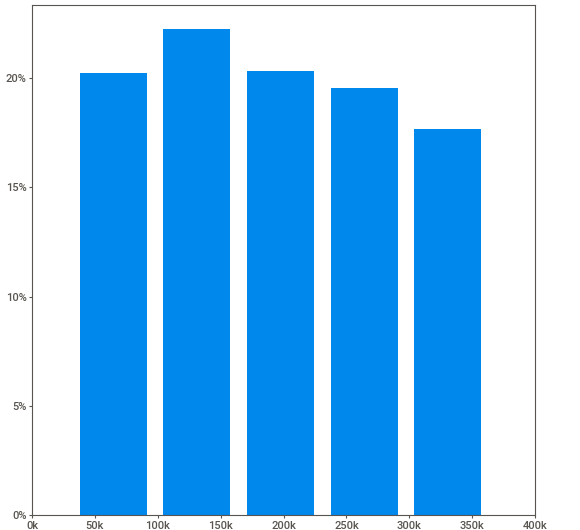
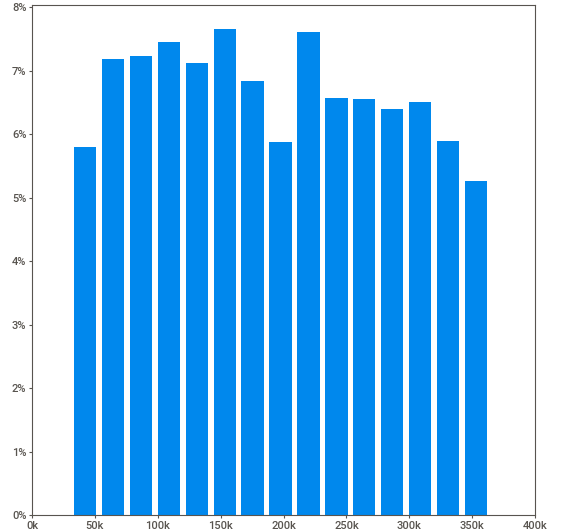
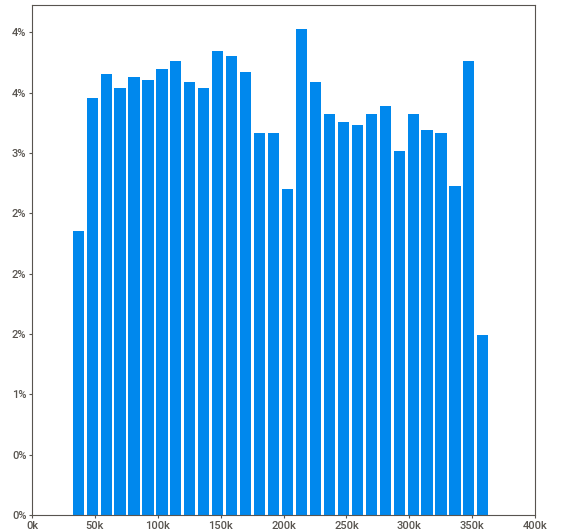
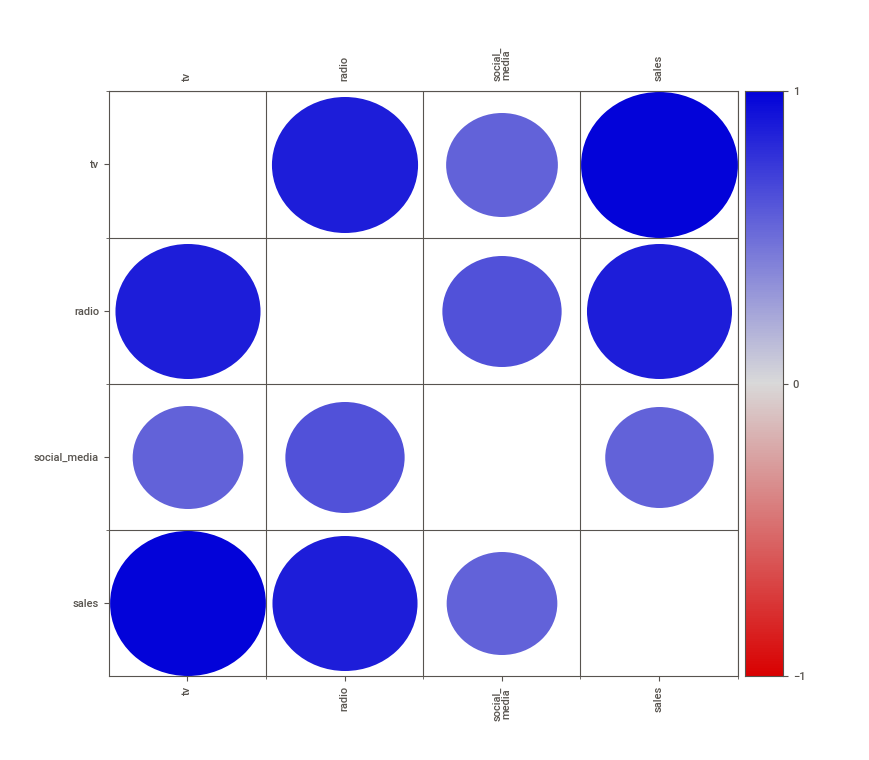
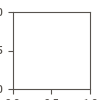

In [6]:
# inspect the dataframe with sweetviz
report = sv.analyze(df)

report.show_notebook()

In [7]:
# the info method
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4546 entries, 0 to 4545
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tv            4546 non-null   int64  
 1   radio         4546 non-null   float64
 2   social_media  4546 non-null   float64
 3   sales         4546 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 142.2 KB


In [8]:
# train test split
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.3,
                                     random_state=1234)

In [9]:
# look at transformed data
df_train.head()

,tv,radio,social_media,sales
4512,77000,27906.10,4144.92,277733.41
3674,81000,32481.80,5065.84,287915.42
2806,29000,9850.78,1774.85,96694.36
4183,80000,26884.81,6158.39,280660.88
2621,70000,25228.58,1980.81,251403.64


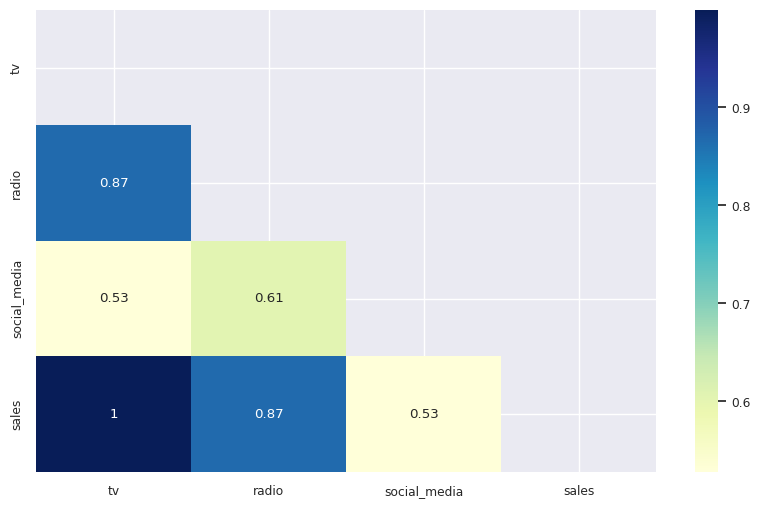

In [14]:
sns.set(font_scale=0.8)

correlation_matrix = df_train.corr()

fig, ax = plt.subplots(figsize=(10,6))


mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

ax = sns.heatmap(correlation_matrix, mask=mask, ax=ax, cmap='YlGnBu', annot=True)

# Predictive Analytics

In [15]:
# let's look at the columns again
print(df_train.columns)

Index(['tv', 'radio', 'social_media', 'sales'], dtype='object')


In [16]:
# we need to separate target (y) from the input variables X

X_train = df_train.drop('sales', axis=1)
X_test = df_test.drop('sales', axis=1)

y_train = df_train['sales']
y_test = df_test['sales']

In [17]:
# we can inspect the arrays
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3182, 3)
(1364, 3)
(3182,)
(1364,)


In [18]:
# lazypredict
from lazypredict.Supervised import LazyRegressor

# load the lazyclassifier engine - specify settings
regression = LazyRegressor(verbose=0, ignore_warnings=True,
                     custom_metric=None, predictions=True)

# run the lazyclassifier engine
models, predictions = regression.fit(X_train, X_test, y_train, y_test)

models

100%|██████████| 42/42 [00:12<00:00,  3.37it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000288 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 602
[LightGBM] [Info] Number of data points in the train set: 3182, number of used features: 3
[LightGBM] [Info] Start training from score 192562.799110


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
OrthogonalMatchingPursuitCV,1.00,1.00,3021.48,0.03
OrthogonalMatchingPursuit,1.00,1.00,3021.48,0.01
LarsCV,1.00,1.00,3022.39,0.02
LassoLarsCV,1.00,1.00,3022.39,0.03
LassoLars,1.00,1.00,3022.53,0.02
RANSACRegressor,1.00,1.00,3022.55,0.02
LinearRegression,1.00,1.00,3022.55,0.02
TransformedTargetRegressor,1.00,1.00,3022.55,0.02
Lars,1.00,1.00,3022.55,0.02


In [19]:
# sort the results
models.sort_values(by=['RMSE'], axis=0, ascending=True)

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
OrthogonalMatchingPursuitCV,1.00,1.00,3021.48,0.03
OrthogonalMatchingPursuit,1.00,1.00,3021.48,0.01
LarsCV,1.00,1.00,3022.39,0.02
LassoLarsCV,1.00,1.00,3022.39,0.03
LassoLars,1.00,1.00,3022.53,0.02
RANSACRegressor,1.00,1.00,3022.55,0.02
LinearRegression,1.00,1.00,3022.55,0.02
TransformedTargetRegressor,1.00,1.00,3022.55,0.02
Lars,1.00,1.00,3022.55,0.02


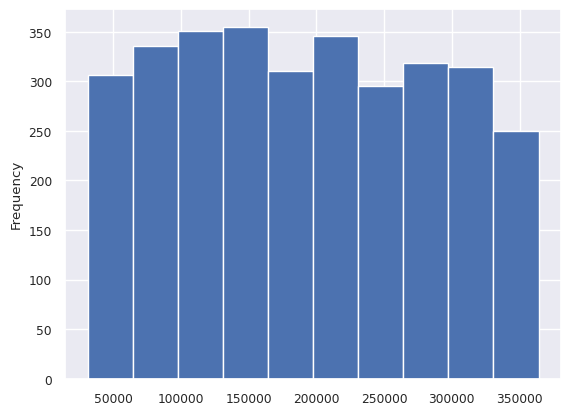

In [20]:
df_train['sales'].plot(kind='hist');

In [21]:
# a more interpretable measure of error

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    try:
      difference = y_true - y_pred
      actual = y_true
      absolute_pct_error = np.mean(np.abs(difference / actual)) * 100
    except Exception:
      absolute_pct_error = 0
    return np.round(absolute_pct_error, decimals=2)

In [22]:
# now we need to run our models and evaluate their performance
from sklearn.linear_model import LinearRegression
import sklearn.metrics as met

# Step 1: initialise the model with its key arguments - if any
model = LinearRegression()

# Step 2: train the model on X_train
model.fit(X_train, y_train)

# Step 3: predict y_pred based on X_test
y_pred = model.predict(X_test)

# Step 4: evaluate and compare y_test vs. y_pred
r2_score = met.r2_score(y_test, y_pred) *100
# rmse - root mean squared error - unit level
rmse = float(format(np.sqrt(met.mean_squared_error(y_test,y_pred)),'.3f'))
# in % +-
mape = mean_absolute_percentage_error(y_test, y_pred) * 100

print(r2_score)
print(rmse)
print(mape)

99.8942832338757
3022.546
175.0


In [23]:
# what is the average of our y
df['sales'].mean()

192413.3321117466

| Metric Name | Description | Interpretation | Sklearn Function |
|-------------|-------------|----------------|------------------|
| R² Score | Proportion of variance in the dependent variable that is predictable from the independent variables. | Values range from 0 to 1. A value closer to 1 indicates a better fit. | `sklearn.metrics.r2_score` |
| Mean Absolute Error (MAE) | Average of the absolute differences between predicted values and actual values. It measures the average magnitude of errors in a set of predictions, without considering their direction. | Lower values are better. A value of 0 indicates no error. | `sklearn.metrics.mean_absolute_error` |
| Mean Squared Error (MSE) | Average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value. | Lower values are better. A value of 0 indicates no error. MSE is more sensitive to outliers than MAE. | `sklearn.metrics.mean_squared_error` |
| Root Mean Squared Error (RMSE) | Square root of the average of squared differences between prediction and actual observation. | Lower values are better. A value of 0 indicates no error. RMSE is more sensitive to outliers than MAE. | Not directly in sklearn, calculated as `np.sqrt(sklearn.metrics.mean_squared_error)` |
| Mean Squared Logarithmic Error (MSLE) | Measures the ratio between the true and predicted values. It's the mean of the squared logarithm of the errors. | Lower values are better. A value of 0 indicates no error. Useful when targets having exponential growth, such as population counts. | `sklearn.metrics.mean_squared_log_error` |
| Median Absolute Error | Median of all the absolute differences between the predicted values and actual values. | Lower values are better. Less sensitive to outliers compared to MAE and MSE. | `sklearn.metrics.median_absolute_error` |


In hyperparameter tuning, we run many models and collect their results into a table and then sort by our results to find the best models!

In [24]:
# create a results table

results = pd.DataFrame({
        'Model_Name': ['Linear_Regression_Basic'],
        'R2 Score': [r2_score],
        'rmse': [rmse],
        'MAPE': [mape]
})

results

,Model_Name,R2 Score,rmse,MAPE
0,Linear_Regression_Basic,99.89,3022.55,175.00


In [25]:
# error prediction function
from yellowbrick.regressor import PredictionError

def error_prediction_chart(model, X_train, X_test, y_train, y_test):
    '''
    This is a basic scatterplot from Yellowbrick
    '''
    visualizer = PredictionError(model)
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.show()
    plt.clf()

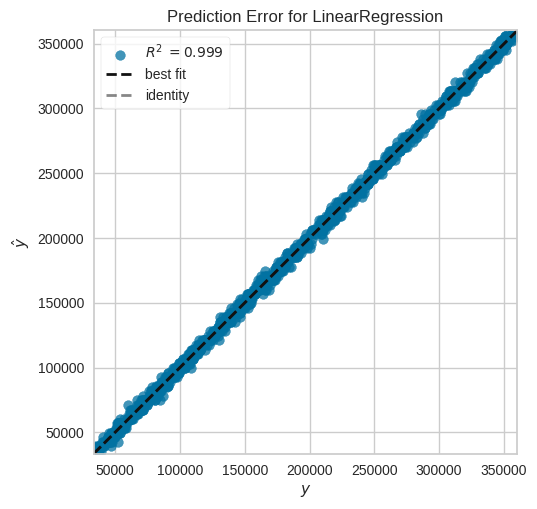

<Figure size 800x550 with 0 Axes>

In [26]:
# apply the function/formula

error_prediction_chart(model, X_train, X_test, y_train, y_test)

In [27]:
df_train.head()

,tv,radio,social_media,sales
4512,77000,27906.10,4144.92,277733.41
3674,81000,32481.80,5065.84,287915.42
2806,29000,9850.78,1774.85,96694.36
4183,80000,26884.81,6158.39,280660.88
2621,70000,25228.58,1980.81,251403.64


In [28]:
!pip install statsmodels

In [30]:
# use statsmodels
import statsmodels.formula.api as smf

# this is our formula
# y(sales) = x1(tv_spend) + x2(radio) + x3(social)
f = "sales ~ tv + radio + social_media"

model_ols = smf.ols(formula=f, data=df_train)

model_fit = model_ols.fit()

# To print the summary
print(model_fit.summary())


                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.077e+06
Date:                Wed, 21 Feb 2024   Prob (F-statistic):               0.00
Time:                        13:14:07   Log-Likelihood:                -29902.
No. Observations:                3182   AIC:                         5.981e+04
Df Residuals:                    3178   BIC:                         5.984e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -150.8031    121.778     -1.238   

In [42]:
tv = 3.5605
radio = 0.0001
social = 0.0186

spend_1000_tv = tv *2000
spend_1000_radio = radio *2000
spend_1000_social = social *2000

print(f"If we spend $1000 on TV, we will get {spend_1000_tv}")
print(f"If we spend $1000 on Radio, we will get {spend_1000_radio}")
print(f"If we spend $1000 on Social, we will get {spend_1000_social}")

If we spend $1000 on TV, we will get 7121.0
If we spend $1000 on Radio, we will get 0.2
If we spend $1000 on Social, we will get 37.199999999999996


In [33]:
# is there a difference in the types of errors our model does
# comparing train vs. test

from yellowbrick.regressor import ResidualsPlot

def residual_plot(model, X_train, X_test, y_train, y_test):
    '''
    We are looking at the errors of our model
    '''
    visualizer = ResidualsPlot(model)
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.show()
    plt.clf()

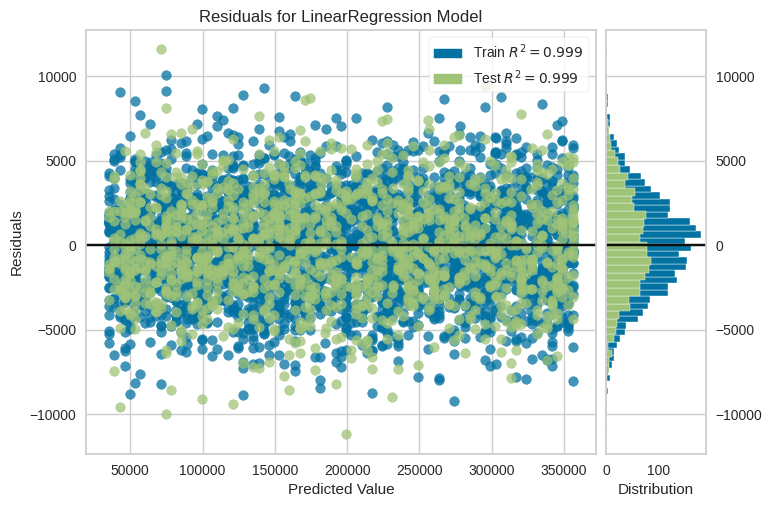

<Figure size 800x550 with 0 Axes>

In [34]:
# have a look at the residual plot

residual_plot(model, X_train, X_test, y_train, y_test)

In [35]:
# let's run a Lasso Regression model
from sklearn.linear_model import Lasso

# step 1) initialise the model
model_lasso = Lasso(alpha=0.1, max_iter=1500)

# step 2) train the model on the X_train
model_lasso.fit(X_train, y_train)

# step 3) predict y_pred based on X_test
y_pred_lasso = model_lasso.predict(X_test)
y_pred_lasso = pd.Series(y_pred_lasso, index=y_test.index)


In [36]:
# evaluate the model - look at RMSE

r2_score = met.r2_score(y_test, y_pred_lasso)
# rmse - root mean squared error - unit level
rmse = float(format(np.sqrt(met.mean_squared_error(y_test,y_pred_lasso)),'.3f'))
# in % +-
mape = mean_absolute_percentage_error(y_test, y_pred_lasso) * 100

print(r2_score)
print(rmse)
print(mape)

0.9989428323398412
3022.546
175.0


In [37]:
# our comparison table
results

,Model_Name,R2 Score,rmse,MAPE
0,Linear_Regression_Basic,99.89,3022.55,175.00


In [38]:
# we want to add a row
row = results.shape[0]

results.loc[row] = ["Lasso Regression", r2_score, rmse, mape]

results

,Model_Name,R2 Score,rmse,MAPE
0,Linear_Regression_Basic,99.89,3022.55,175.00
1,Lasso Regression,1.00,3022.55,175.00


In [39]:
results.columns

Index(['Model_Name', 'R2 Score', 'rmse', 'MAPE'], dtype='object')

In [40]:
# Isioma's question - which model should we use?

results.sort_values(by=['rmse', 'MAPE'], ascending=True)

,Model_Name,R2 Score,rmse,MAPE
0,Linear_Regression_Basic,99.89,3022.55,175.00
1,Lasso Regression,1.00,3022.55,175.00


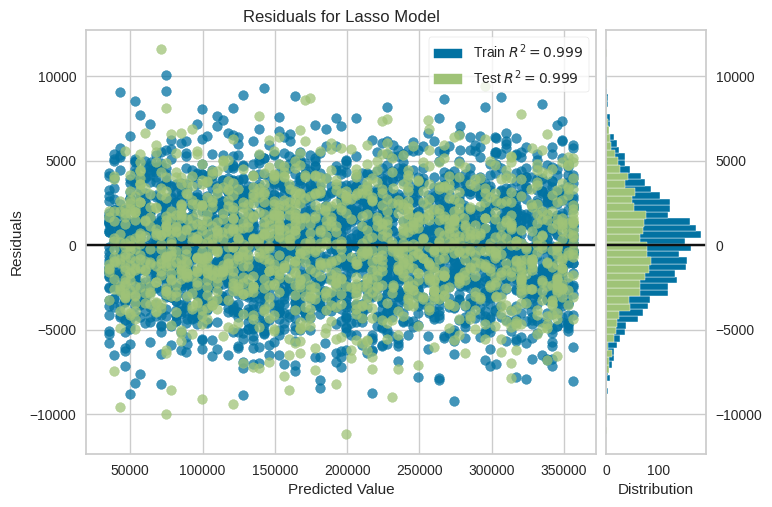

<Figure size 800x550 with 0 Axes>

In [41]:
residual_plot(model_lasso, X_train, X_test, y_train, y_test)

# Actionable Recommendations

1) **Focus on TV Advertising**: Given its high ROI and strong correlation with sales, allocate more budget towards TV advertising. The coefficient showed us that for every 1 dollar spend, we got $3.5 back in sales!

2) **Re-evaluate the Radio Strategy**: Radio seems to have a very low rate of return. Is this really useful for us?

3) **Identify Unknown factors**: TV might be masking online (digital channels).

